In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
import warnings
from scipy import stats
import statistics
warnings.filterwarnings('ignore')
%matplotlib inline

We imported all the required and important packages now let us load the data and explore it

In [0]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [0]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [0]:
print('The train dataset has {} rows and {} columns'.format(train.shape[0],train.shape[1]))
print('The test dataset has {} rows and {} columns'.format(test.shape[0],test.shape[1]))

The train dataset has 1460 rows and 81 columns
The test dataset has 1459 rows and 80 columns


In [0]:
# lets see what is the train data containing
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [0]:
# lets see what is the test data containing 
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

AS WE CAN SEE BOTH OF THEM HAVE NULLS, BUT THE NULLS ARE NOT IN SAME COLUMNS SO WHEN WE IMPUTE OR WHEN WE IGNORE THE ROWS THAT HAVE NULL IT WILL BE A PROBLEM, BECAUSE WHEN WE ENCODE THE DATA OR USE DUMMIES WE WILL GET UNEVEN TRAIN AND TEST FEATURES WHICH WILL NOT WORK WHEN WE FIT THE TEST DATA AND PREDICT THE TEST DATA VALUES SO IT IS BETTER TO CONCAT BOTH THE DATA AND PROCESS THEM IN A SIMILAR MANNER

In [0]:
#Concating train data and test data for easiness of data pre processing
combination=pd.concat([train.iloc[:,:-1],test],axis=0)
print('The concated data contains {} rows and {} columns'.format(combination.shape[0],combination.shape[1]))

The concated data contains 2919 rows and 80 columns


In [0]:
# There are some features which should be strings or orbjects but they are named as int or float 
# we need to hard code them as string or object and then proceede for furhter steps

# MS Subclass is a varibale to decide the type of dwelling so it should be a string or object
combination['MSSubClass']=combination['MSSubClass'].apply(str)

#OverallCond is a varibale to decide the type of condition of the house 
combination['OverallCond']=combination['OverallCond'].apply(str)

#OverallQual is also a vartiable to decide the type of condition of the house
combination['OverallQual']=combination['OverallQual'].apply(str)

#All the Year related features should be in strings not in integers
combination['YrSold']=combination['YrSold'].apply(str)
combination['MoSold']=combination['MoSold'].apply(str)
combination['YearRemodAdd']=combination['YearRemodAdd'].apply(str)
combination.YearBuilt=combination.YearBuilt.astype(str)


In [0]:
#.info() will give us a brief info about the data.
combination.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null object
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null object
OverallCond      2919 non-null object
YearBuilt        2919 non-null object
YearRemodAdd     2919 non-null object
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918

NOW WE HAVE BOTH THE DATA'S COMBINED NOW WE NEED TO FIRST DEAL WITH THE 'NULL' VALUES IN THE DATA AS THEY CAN BE THE MOST DANGEROUS PROBLEM WHILE TRAINING THE DATA. THE DATA CONTAINS BOTH NUMERICAL AND CATEGORICAL FEATURES SO LETS SEPARATE THEM AND FIND OUT HOW MUCH OF THE PERCENTAGE OF THE DATA IS HAVING MISSING VALUES SO THAT WE CAN TAKE FURTHER ACTIONS. 

In [0]:
# dividing numerical features separately by using data types option
numerical_features=combination.select_dtypes(include=['int64','float64'])

In [0]:
# dividing categorical featrures separataley by using data types option
categorical_features=combination.select_dtypes(exclude=['int64','float64'])

LETS SEE WHAT ARE THE PERCENTATGES OF THE NULL VALUES IN BOTH NUMERICAL FEATUTRES AND IN CATEGORICAL FEATURES

In [0]:
# LETS FIND OUT THE PERCENTAGE OF MISSING VALUES IN THE NUMERICAL FEATURES
total=numerical_features.isnull().sum().sort_values(ascending=False)
percent=(numerical_features.isnull().sum()/numerical_features.count()).sort_values(ascending=False)
numerical_missing=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
numerical_missing[numerical_missing.Percent>0]

,Total,Percent
LotFrontage,486,0.199753
GarageYrBlt,159,0.057609
MasVnrArea,23,0.007942
BsmtHalfBath,2,0.000686
BsmtFullBath,2,0.000686
TotalBsmtSF,1,0.000343
BsmtUnfSF,1,0.000343
GarageCars,1,0.000343
GarageArea,1,0.000343
BsmtFinSF2,1,0.000343


In [0]:
# LETS FIND OUT THE PERCENTAGE OF MISSING VALUES IN THE CATGORICAL FEATURES
total0=categorical_features.isnull().sum().sort_values(ascending=False)
percent=(categorical_features.isnull().sum()/categorical_features.count()).sort_values(ascending=False)
categorical_missing=pd.concat([total0,percent],axis=1,keys=['Total','Percent'])
categorical_missing[categorical_missing.Percent>0]

,Total,Percent
PoolQC,2909,290.900000
MiscFeature,2814,26.800000
Alley,2721,13.742424
Fence,2348,4.112084
FireplaceQu,1420,0.947298
GarageFinish,159,0.057609
GarageCond,159,0.057609
GarageQual,159,0.057609
GarageType,157,0.056843
BsmtExposure,82,0.028904


LETS NOW DEAL WITH ALL THE NULL VALUES WE WILL BE USING DIFFERENT METHODES BASED ON THE TYPE OF MISSING VALUES.
IF YOU HAVE A DATA DICTIONARY PLEASE LOOK AT IT BECAUSE IT WILL HELP YOU TO IDENTIFY WHAT EACH COLUMN REPRESENTS AND WILL ALSO GIVE YOU INFORMATION ABOUT WHY THERE ARE NULL VALUES IN OUR CASE WE HAVE DATA DICTONARY AND WE CAN SEE THAT SOME INFORMATION ABOUT MISSING VALUES IS GIVEN IN SOME OF THE FEATURES

Lets first deal with variables which are more in number and interconnected

In [0]:
# Lets now deal with all the basement variables 
#fill with None because in the data dictonary it is given as NA is no basement (Categorical Features)
combination['BsmtQual']=combination['BsmtQual'].fillna('None')
combination['BsmtCond']=combination['BsmtCond'].fillna('None')
combination['BsmtFinType1']=combination['BsmtFinType1'].fillna('None')
combination['BsmtFinType2']=combination['BsmtFinType2'].fillna('None')
combination['BsmtExposure']=combination['BsmtExposure'].fillna('None')

#Fill with 0 because the values with Null correspond to other null values in basement features(Numerical Features)
combination['BsmtFinSF1']=combination['BsmtFinSF1'].fillna(0)
combination['BsmtFinSF2']=combination['BsmtFinSF2'].fillna(0)
combination['BsmtUnfSF']=combination['BsmtUnfSF'].fillna(0)
combination['BsmtFullBath']=combination['BsmtFullBath'].fillna(0)
combination['BsmtHalfBath']=combination['BsmtHalfBath'].fillna(0)
combination['TotalBsmtSF']=combination['TotalBsmtSF'].fillna(0)

In [0]:
# Lets now deal with all the garage variables
# fill with None because in the data dictornary it is given as NA is no garage(Categorical Features)
combination['GarageType']=combination['GarageType'].fillna('None')
combination['GarageFinish']=combination['GarageFinish'].fillna('None')
combination['GarageQual']=combination['GarageQual'].fillna('None')
combination['GarageCond']=combination['GarageCond'].fillna('None')

# fill with 0 because the values with null correspond to other null values in garge features(Numerical Features)
combination['GarageYrBlt']=combination['GarageYrBlt'].fillna(0)
combination['GarageArea']=combination['GarageArea'].fillna(0)
combination['GarageCars']=combination['GarageCars'].fillna(0)

In [0]:
# lets now deal with all the masonary vineer variables
#fill with None because in the data dictonary it is given as None as None (Categorical Features)
combination['MasVnrType']=combination['MasVnrType'].fillna('None')

# Fill with 0 becuase the values with null correspond to other null values in masonary vineer features
combination['MasVnrArea']=combination['MasVnrArea'].fillna(0)

In [0]:
# Lets now deal with the only one numerical Feature which is having missing values after treating remaining ones
# LotFrontage is the feet of street connected to the property
# We are assuming that it would be same for each neighbourhood so we would like to fill the values based on the 
# neighbourhood the property is located 

combination['LotFrontage']=combination.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))

In [0]:
#Lets now deal with all the remaining categorical Features which have missing values

# PoolQC in the data dictonary it says NA is no pool so lets fill it with None
combination['PoolQC']=combination['PoolQC'].fillna('None')

#MiscFeature also says NA is None 
combination['MiscFeature']=combination['MiscFeature'].fillna('None')

# Alley, data dictonary says NA is no alley access so lets fill it with None
combination['Alley']=combination['Alley'].fillna('None')

#Fence, data dictonary says NA is no fence so lets fill it with None
combination['Fence']=combination['Fence'].fillna('None')

#FireplaceQU, data ditctonary says Na is no fireplace so lets fill it with None
combination['FireplaceQu']=combination['FireplaceQu'].fillna('None')

#mszoning here there is no description about missing values so lets fill them with MostRepeating(Mode)
combination['MSZoning']=combination['MSZoning'].fillna(combination['MSZoning'].mode()[0])

#Functional, data dictonary says to use Typical if there is unwanted data
combination['Functional']=combination['Functional'].fillna('Typ')

#Utilites, this feature can be removed all of the data except one value is AllPub and the other is NoSeWa
combination=combination.drop('Utilities',1)

#Electrical,data dictonary doesnt say anything about missing values, lets fill them with Most Repeating (Mode)
combination['Electrical']=combination['Electrical'].fillna(combination['Electrical'].mode()[0])

#KitchenQual,data dictonary doesnt say anything about missing values, lets fill them with MOst Repeating(Mode)
combination['KitchenQual']=combination['KitchenQual'].fillna(combination['KitchenQual'].mode()[0])

#SaleType,data dictonary doesnt say anything about missing values, lets fill them with Most Repeating(Mode)
combination['SaleType']=combination['SaleType'].fillna(combination['SaleType'].mode()[0])

#Exterior,data dictonary doesnt say anything about missing values, lets fill them with most repeating (Mode)
combination['Exterior1st']=combination['Exterior1st'].fillna(combination['Exterior1st'].mode()[0])
combination['Exterior2nd']=combination['Exterior2nd'].fillna(combination['Exterior2nd'].mode()[0])

In [0]:
# LETS FIND OUT THE PERCENTAGE OF MISSING VALUES IN THE COMBINED DATA AFTER DATA PROCESSING 
total1=combination.isnull().sum().sort_values(ascending=False)
percent=(combination.isnull().sum()/combination.count()).sort_values(ascending=False)
missing=pd.concat([total1,percent],axis=1,keys=['Total','Percent'])
missing[missing.Percent>0]

,Total,Percent


In [0]:
# adding new features
combination['totalsf']=combination['1stFlrSF']+combination['2ndFlrSF']+combination['TotalBsmtSF']

NOW WE CLEANED OUR DATA AND REMOVED ALL THE MISSING VALUES BY IMPUTING THEM.

WE CAN HAVE A QUESTION YOU CAN JUST DELETE THE ENTRIES OF THE NULL VALUE ROWS WHICH HAVE LESS THAN 15% OF MISSING VALUES, YES WE CAN DO THAT BUT IT IS NOT POSSBILE IN THIS SCENARIO AS WE HAVE NULL VALUES ROWS IN TEST DATA AS WELL AND WE NEED TO UPLOAD THE PREDICTED RESULTS IN THE WEBSITE WHICH DOESNOT ACCEPT LESS RECORDS WITH RESPECT TO TEST DATA THAT IS WHY WE IMPUTED THE DATA INSTEAD OF REMOVING THEM.

FEATURE ENGINEERING


### Now That the missing values are removed now we need to concentrate on outliers and data distribution

In [0]:
# Most important things are to check
#1. Skewness
#2. Kurtosis
#3. Data distribution
#4. Outliers

# If these are not in the acceptable range then we need to process them using transfomations and get them into 
# acceptable values

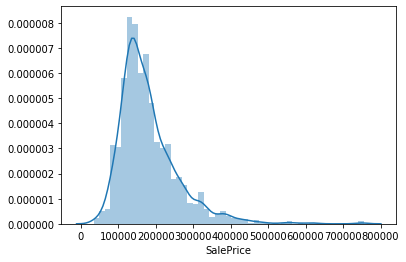

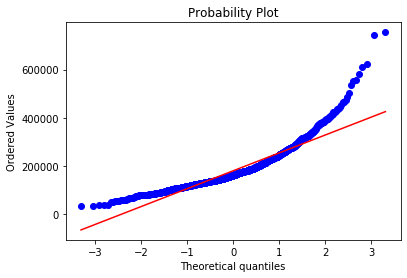

In [0]:
#Lets see if the target variable SalePrice is propely distributed or it is skwed.
sns.distplot(train['SalePrice'])
fig=plt.figure()
res=stats.probplot(train.SalePrice,plot=plt)

In [0]:
if train.SalePrice.skew()>0:
    print(train.SalePrice.skew(),'The data is Right Skewed')
else:
    print(train.SalePrice.skew(),'The data is Left Skewed')

1.8828757597682129 The data is Right Skewed


In [0]:
if train.SalePrice.kurt()>3:
    print(train.SalePrice.kurt(),'The data is Leptokurtic')
elif train.SalePrice.kurt()<3:
    print(train.SalePrice.kurt(),'The data is Platokurtic')
else:
    print(train.SalePrice.kurt(),'The data is normal ')

6.536281860064529 The data is Leptokurtic


SO HERE WE CAN SEE THAT THE TARGET VARIABLE 'SALEPRICE' IS NOT IN NORAMAL DISTRIBUTION IS IS HAVING POSITIVE SKEWNESS AND ALSO HAVING PEAKEDNESS SO WE NEED TO NORAMALISE THE TARGET VARIABLE.

SO WE NEED TO APPLY SOME TRANSFORMATION TO GET THE TARGET VARIABLE INTO NORMAL FORM

In [0]:
skew=numerical_features.skew()
skewness=pd.DataFrame(skew,columns=['Skewness'])

In [0]:
# Lets see how many are positively skewed or Right Skewed
skewness[skewness.Skewness>1]

,Skewness
LotFrontage,1.503278
LotArea,12.829025
MasVnrArea,2.602589
BsmtFinSF1,1.425722
BsmtFinSF2,4.147456
TotalBsmtSF,1.162882
1stFlrSF,1.470360
LowQualFinSF,12.094977
GrLivArea,1.270010
BsmtHalfBath,3.932018


In [0]:
# Lets see how many are Negatively skewed or left Skewed
skewness[skewness.Skewness<0]

,Skewness
GarageYrBlt,-0.382150
GarageCars,-0.218373


In [0]:
transform=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','TotalBsmtSF','1stFlrSF','LowQualFinSF','LowQualFinSF',
           'GrLivArea','BsmtHalfBath','KitchenAbvGr','WoodDeckSF','OpenPorchSF',
           'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','GarageCars','GarageYrBlt']

LET US CONSIDER THE FEATURES WHICH HAVE THE VALUE MORE THAN OR EQUAL TO 1 AND TRANSFORM THEM TO GET PROPER DISTRIBUTION
so we will perform Box-Cox transformation to reduce the skewness of these variables.

OUTLIERS THIS IS ANOTHER IMPORTANT CONCEPT EVERY ONE HAS THIS QUESTION DO WE NEED TO REMOVE OUTLIERS OR SHOULD WE KEEP THEM IN THE DATA, THIS DEPENDS ON THE BUSINESS CONTEXT,HERE THE BUSINESS CONTEXT IS TO PREDICT THE PRICES OF THE HOUSE WITH ALL THE GIVEN VARIABLES AND THIS CAN HAVE OUTLIERS BECAUSE THE TRAINING DATA WILL BE HAVING MANY DIFFERENT FACTORS TO CONTRIBUTE TO THE PRICE SO WE CANNOT REMOVE OUTLIERS BUT WE ARE PERFORMING TRANSFORMATION WHICH WILL HELP TO REDUCE THE OUTLIERS SO BETTER PERFORM TRANSFORMATION INSTEAD OF REMOVING OUTLIERS TO HAVE A GOOD DATA

In [0]:
# LETS NOW PERFORM TRANSFORMATIONS AND PROCESS THE DATA

from scipy.special import boxcox1p

l=0.15

for i in transform:
    combination[i]=boxcox1p(combination[i],l)

In [0]:
#Lets also transform the target varibale as we saw it is not normal
train.SalePrice=np.log(train.SalePrice)

By Now most of the Pre processing Part is completed but still there are some small changes to be tweaked in the data and the Next step is to divide the training and testing data and start the modeling 

In [0]:
#Some of the features need to be lable encoded for easy understanding of the machine

from sklearn.preprocessing import LabelEncoder

features=['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'OverallQual','YrSold', 'MoSold']

for i in features:
    lb = LabelEncoder() 
    lb.fit(list(combination[i].values)) 
    combination[i] = lb.transform(list(combination[i].values))

In [0]:
# Lets also use the dummies to transform the data and make it ready for modeling
combination=pd.get_dummies(combination)

In [0]:
combination.shape

(2919, 399)

In [0]:
ntrain=combination[:1460]
ntest=combination[1460:]

In [0]:
ntrain.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,...,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,10,5.831328,19.212182,1,1,3,0,7,4,8.059126,2,4,2,4,3,2,11.170327,6,0.0,150.0,11.692623,0,1,11.692623,854,0.0,13.698888,1.0,0.000000,2,1,3,0.730463,2,8,6,0,3,14.187527,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,5,6.221214,19.712205,1,1,3,0,6,7,0.000000,3,4,2,4,1,0,12.062832,6,0.0,284.0,12.792276,0,1,12.792276,0,0.0,12.792276,0.0,0.730463,2,0,3,0.730463,3,6,6,1,5,14.145138,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,10,5.914940,20.347241,1,1,0,0,7,4,7.646538,2,4,2,4,2,2,10.200343,6,0.0,434.0,11.892039,0,1,11.892039,866,0.0,13.832085,1.0,0.000000,2,1,3,0.730463,2,6,6,1,5,14.184404,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,11,5.684507,19.691553,1,1,0,0,7,4,0.000000,3,4,4,1,3,0,8.274266,6,0.0,540.0,11.354094,2,1,12.013683,756,0.0,13.711364,1.0,0.000000,1,0,3,0.730463,2,7,6,1,2,14.179714,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,5,10,6.314735,21.325160,1,1,0,0,8,4,9.391827,2,4,2,4,0,2,10.971129,6,0.0,490.0,12.510588,0,1,12.510588,1053,0.0,14.480029,1.0,0.000000,2,1,4,0.730463,2,9,6,1,5,14.182841,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [0]:
ntest.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,...,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,5,6.221214,20.479373,1,1,3,0,5,5,0.000000,3,4,4,4,3,5,10.105326,3,7.397498,270.0,11.775114,4,1,11.818680,0,0.0,11.818680,0.0,0.0,1,0,2,0.730463,3,5,6,0,3,14.121376,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1462,5,6.244956,21.327220,1,1,0,0,6,5,6.808145,3,4,4,4,3,0,11.901094,6,0.000000,406.0,12.943735,4,1,12.943735,0,0.0,12.943735,0.0,0.0,1,1,3,0.730463,2,6,6,0,3,14.116605,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1463,10,6.073289,21.196905,1,1,0,0,5,4,0.000000,3,4,2,4,3,2,11.476685,6,0.000000,137.0,11.916131,2,1,11.916131,701,0.0,13.551272,0.0,0.0,2,1,3,0.730463,3,6,6,1,5,14.178149,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1464,10,6.172972,19.865444,1,1,0,0,6,5,3.858807,3,4,4,4,3,2,10.749651,6,0.000000,324.0,11.910125,0,1,11.910125,678,0.0,13.504453,0.0,0.0,2,1,3,0.730463,2,7,6,1,2,14.179714,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1465,0,5.093857,17.257255,1,1,0,0,8,4,0.000000,2,4,2,4,3,0,8.720170,6,0.000000,1017.0,12.833625,0,1,12.833625,0,0.0,12.833625,0.0,0.0,2,0,2,0.730463,2,5,6,0,3,14.170316,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


## Modeling

In [0]:
!pip install catboost

In [0]:
# LETS START ALL THE PACKAGES THAT WE NEED TO USE FOR MODELING
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, ElasticNet,Lasso,BayesianRidge,LassoLarsIC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
import catboost as cat
import xgboost as xgb
import lightgbm as lgb


In [0]:
ntrain.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,...,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,10,5.831328,19.212182,1,1,3,0,7,4,8.059126,2,4,2,4,3,2,11.170327,6,0.0,150.0,11.692623,0,1,11.692623,854,0.0,13.698888,1.0,0.000000,2,1,3,0.730463,2,8,6,0,3,14.187527,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,5,6.221214,19.712205,1,1,3,0,6,7,0.000000,3,4,2,4,1,0,12.062832,6,0.0,284.0,12.792276,0,1,12.792276,0,0.0,12.792276,0.0,0.730463,2,0,3,0.730463,3,6,6,1,5,14.145138,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,10,5.914940,20.347241,1,1,0,0,7,4,7.646538,2,4,2,4,2,2,10.200343,6,0.0,434.0,11.892039,0,1,11.892039,866,0.0,13.832085,1.0,0.000000,2,1,3,0.730463,2,6,6,1,5,14.184404,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,11,5.684507,19.691553,1,1,0,0,7,4,0.000000,3,4,4,1,3,0,8.274266,6,0.0,540.0,11.354094,2,1,12.013683,756,0.0,13.711364,1.0,0.000000,1,0,3,0.730463,2,7,6,1,2,14.179714,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,5,10,6.314735,21.325160,1,1,0,0,8,4,9.391827,2,4,2,4,0,2,10.971129,6,0.0,490.0,12.510588,0,1,12.510588,1053,0.0,14.480029,1.0,0.000000,2,1,4,0.730463,2,9,6,1,5,14.182841,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [0]:
x=ntrain.drop('Id',1)
y=train.SalePrice
Id=ntest.Id
final_test=ntest.drop('Id',1)

In [0]:
model=cat.CatBoostRegressor()

In [0]:
model.fit(x,y,verbose=True)

0:	learn: 0.3914554	total: 56.6ms	remaining: 56.5s
1:	learn: 0.3838212	total: 63.5ms	remaining: 31.7s
2:	learn: 0.3764077	total: 70.5ms	remaining: 23.4s
3:	learn: 0.3698491	total: 77.3ms	remaining: 19.2s
4:	learn: 0.3628789	total: 83.3ms	remaining: 16.6s
5:	learn: 0.3566146	total: 89.5ms	remaining: 14.8s
6:	learn: 0.3500791	total: 95.6ms	remaining: 13.6s
7:	learn: 0.3438894	total: 102ms	remaining: 12.7s
8:	learn: 0.3380385	total: 109ms	remaining: 12s
9:	learn: 0.3315108	total: 116ms	remaining: 11.4s
10:	learn: 0.3258384	total: 122ms	remaining: 11s
11:	learn: 0.3198995	total: 128ms	remaining: 10.6s
12:	learn: 0.3146995	total: 135ms	remaining: 10.2s
13:	learn: 0.3096214	total: 144ms	remaining: 10.1s
14:	learn: 0.3046427	total: 151ms	remaining: 9.94s
15:	learn: 0.2994748	total: 159ms	remaining: 9.76s
16:	learn: 0.2947464	total: 166ms	remaining: 9.59s
17:	learn: 0.2898625	total: 173ms	remaining: 9.44s
18:	learn: 0.2850635	total: 180ms	remaining: 9.29s
19:	learn: 0.2806112	total: 187ms	rema

In [0]:
print(model.get_all_params())

{'nan_mode': 'Min', 'eval_metric': 'RMSE', 'iterations': 1000, 'sampling_frequency': 'PerTree', 'fold_permutation_block': 0, 'leaf_estimation_method': 'Newton', 'boosting_type': 'Plain', 'feature_border_type': 'GreedyLogSum', 'bayesian_matrix_reg': 0.1000000015, 'l2_leaf_reg': 3, 'random_strength': 1, 'rsm': 1, 'boost_from_average': True, 'model_size_reg': 0.5, 'approx_on_full_history': False, 'subsample': 0.8000000119, 'use_best_model': False, 'random_seed': 0, 'depth': 6, 'has_time': False, 'fold_len_multiplier': 2, 'border_count': 254, 'classes_count': 0, 'sparse_features_conflict_fraction': 0, 'leaf_estimation_backtracking': 'AnyImprovement', 'best_model_min_trees': 1, 'model_shrink_rate': 0, 'loss_function': 'RMSE', 'learning_rate': 0.02999999933, 'score_function': 'Cosine', 'task_type': 'CPU', 'leaf_estimation_iterations': 1, 'bootstrap_type': 'MVS', 'permutation_count': 4}


In [0]:
pred=model.predict(final_test)

In [0]:
np.log

<ufunc 'log'>

In [0]:
pred_final=np.expm1(pred)

In [0]:
pred_final

array([122248.50820985, 161266.49545144, 184827.42402719, ...,
       157824.5480999 , 114095.20775018, 221370.77108407])

In [0]:
final=pd.read_csv('/sample_submission.csv')

In [0]:
final.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [0]:
final=final.drop('SalePrice',1)

In [0]:
final.head()

,Id
0,1461
1,1462
2,1463
3,1464
4,1465


In [0]:
final['SalePrice']=pred_final

In [0]:
final.head()

,Id,SalePrice
0,1461,122248.508210
1,1462,161266.495451
2,1463,184827.424027
3,1464,189359.009103
4,1465,187514.885716


In [0]:
final.to_csv('catboost.csv',index=False)

##  CAT Boost model had a score of 0.12 Rmse now we need to fine tune the parameters and get the best score from it

In [0]:
!pip install xgboost

In [0]:
!pip install lightgbm

In [0]:
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os
import warnings 
warnings.filterwarnings('ignore')

In [0]:
x=ntrain.drop('Id',1)
y=train.SalePrice
Id=ntest.Id
final_test=ntest.drop('Id',1)

In [0]:
overfit = []
for i in x.columns:
    counts = x[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(x) * 100 > 99.94:
        overfit.append(i)

overfit = list(overfit)

In [0]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=x):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

In [0]:
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [0]:
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas=alphas2, random_state=42, cv=kfolds))
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))                                
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))

In [0]:
gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =42)

In [0]:
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )

In [0]:
xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

In [0]:
xgboost.fit(x,y)

[18:11:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=0, missing=None, n_estimators=3460,
             n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
             reg_alpha=6e-05, reg_lambda=1, scale_pos_weight=1, seed=27,
             silent=None, subsample=0.7, verbosity=1)

In [0]:
pred=xgboost.predict(final_test)

In [0]:
pred_final=np.expm1(pred)

In [0]:
final.head()

,Id,SalePrice
0,1461,122248.508210
1,1462,161266.495451
2,1463,184827.424027
3,1464,189359.009103
4,1465,187514.885716


In [0]:
final=final.drop('SalePrice',1)

In [0]:
final['SalePrice']=pred_final

In [0]:
final.head()

,Id,SalePrice
0,1461,123239.773438
1,1462,162426.468750
2,1463,187244.312500
3,1464,189629.546875
4,1465,189536.625000


In [0]:
final.to_csv('xgboost1.csv')

In [0]:
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, gbr, xgboost, lightgbm,model),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [0]:
from datetime import datetime

In [0]:
score = cv_rmse(ridge)
score = cv_rmse(lasso)
print("LASSO: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(elasticnet)
print("elastic net: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(lightgbm)
print("lightgbm: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(gbr)
print("gbr: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(model)
print("catboost: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

LASSO: 0.1320 (0.0293)
 2020-01-13 18:37:01.143495
elastic net: 0.1322 (0.0291)
 2020-01-13 18:38:07.257750
SVR: 0.1342 (0.0357)
 2020-01-13 18:38:22.034997
lightgbm: 0.1223 (0.0188)
 2020-01-13 18:38:38.260582
gbr: 0.1238 (0.0210)
 2020-01-13 18:40:09.758993
[18:40:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:40:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:41:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:41:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:42:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:42:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor

In [0]:
print('START Fit')

print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(x), np.array(y))

print('elasticnet')
elastic_model_full_data = elasticnet.fit(x, y)

print('Lasso')
lasso_model_full_data = lasso.fit(x, y)

print('Ridge')
ridge_model_full_data = ridge.fit(x, y)

print('Svr')
svr_model_full_data = svr.fit(x, y)

print('GradientBoosting')
gbr_model_full_data = gbr.fit(x, y)

print('xgboost')
xgb_model_full_data = xgboost.fit(x, y)

print('lightgbm')
lgb_model_full_data = lightgbm.fit(x, y)

print('model')
catboost_model_fulldata=model.fit(x,y)

START Fit
stack_gen
[18:47:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:47:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:49:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0:	learn: 0.3931556	total: 7.05ms	remaining: 7.05s
1:	learn: 0.3861988	total: 13.4ms	remaining: 6.7s
2:	learn: 0.3794273	total: 19.5ms	remaining: 6.48s
3:	learn: 0.3731363	total: 25.6ms	remaining: 6.37s
4:	learn: 0.3670049	total: 31.6ms	remaining: 6.28s
5:	learn: 0.3612886	total: 37.7ms	remaining: 6.25s
6:	learn: 0.3546562	total: 43.8ms	remain

In [0]:
def blend_models_predict(X):
    return ((0.05 * elastic_model_full_data.predict(X)) + \
            (0.05 * lasso_model_full_data.predict(X)) + \
            (0.1 * catboost_model_fulldata.predict(X)) + \
            (0.05 * ridge_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
            (0.1 * gbr_model_full_data.predict(X)) + \
            (0.15 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.3 * stack_gen_model.predict(np.array(X))))

In [0]:
print('RMSLE score on train data:')
print(rmsle(y, blend_models_predict(x)))

RMSLE score on train data:
0.05919529971526131


In [0]:
blend_predict=blend_models_predict(final_test)

In [0]:
blend_predict

array([11.7103602 , 11.96185375, 12.13193403, ..., 12.01576376,
       11.64664599, 12.27875649])

In [0]:
blend_final=np.expm1(blend_predict)

In [0]:
final=final.drop("SalePrice",1)

In [0]:
final['SalePrice']=blend_final

In [0]:
final.head()

,Id,SalePrice
0,1461,121826.355089
1,1462,156662.229520
2,1463,185707.594171
3,1464,192457.473525
4,1465,187374.233585


In [0]:
final.to_csv('blend2.csv',index=False)